<a href="https://colab.research.google.com/github/Sawan866/githubtutorial/blob/main/Maxima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finding maxima of the function  
##sin(x) - |x|

In [36]:
# Import Part
import random
from typing import List

import numpy as np
import matplotlib.pyplot as plt


# Auxiliary GA Operations

In [85]:
def _utils_constraints(g,min_,max_):

  if max_ and g > max_:
    g = max_
  if min_ and g < min_:
    g = min_
  return g  

In [38]:
def crossover_blend(g1, g2, alpha, min = None, max = None):
  shift = (1 + 2 * alpha) * random.random() - alpha
  new_g1 = (1 - shift) * g1 + shift * g2
  new_g2 = shift * g1 + (1-shift) * g2

  return _utils_constraints(new_g1, min, max), _utils_constraints(new_g2, min, max)
  


In [39]:
def mutate_gaussian(g, mu, sigma, min = None, max = None):
  mutated_gene = g + random.gauss(mu, sigma)
  return _utils_constraints(mutate_gaussian, min, max)

In [54]:
def select_tournament(population, tournament_size):
  new_offspring = []
  for _ in range(len(population)):
    candidates = [random.choice(population) for _ in range(tournament_size)]
    new_offspring.append(max(candidates, key= lambda ind:ind.fitness))
  return new_offspring



In [41]:
def func(x):
  return np.sin(x) - 2 * abs(x)

In [77]:
def get_best(population):
  best = population[0]

  for ind in population:
    if ind.fitness > best.fitness:
      best = ind
    return best

In [70]:
def plot_population(population, number_of_population):
  best = get_best(population)

  x = np.linspace(-10, 10)
  plt.plot(x,func(x), '--', color = 'blue')
  plt.plot([ind.get_gene() for ind in population], [ind.fitness for ind in population], 'o', color = 'orange')
  plt.plot([best.get_gene()],[best.fitness], "s", color = 'green')
  plt.title(f"Generation number {number_of_population}")
  plt.show()
  plt.close()

### Individual Class

In [79]:
class Individual:

  def __init__(self, gene_list: List[float]) -> None:
    self.gene_list = gene_list
    self.fitness = func(self.gene_list[0])

  def get_gene(self):
    return self.gene_list[0]


  @classmethod
  def crossover(cls,parent1,parent2):
    child1_gene,child2_gene = crossover_blend(parent1.get_gene(),parent2.get_gene(),1,-10,10)
    return Individual([child1_gene]), Individual([child2_gene])

  @classmethod
  def mutate(cls,ind):
    mutated_gene = mutate_gaussian(ind.get_gene(),0,1,-10,10)
    return Individual([mutated_gene])

  @classmethod
  def select(cls,population):
    return select_tournament(population, tournament_size= 3)

  @classmethod
  def create_random(cls):
    return Individual([random.randrange(-1000,1000)/100])



## GA Flow


In [80]:
random.seed(52)
# random.seed(16) # Local minima
POPULATION_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.1
MAX_GENERATION = 10

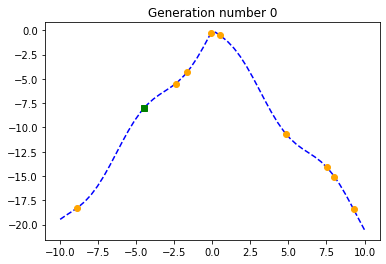

In [81]:
first_population = [Individual.create_random() for _ in range(POPULATION_SIZE)]
plot_population(first_population,0)

In [82]:

generation_number = 0

population = first_population.copy()

while generation_number < MAX_GENERATION:
  generation_number += 1


In [55]:
# generation_number = 0

In [56]:
# population = first_population.copy()


In [57]:
# while generation_number < MAX_GENERATION:
  # generation_number += 1

In [83]:
# SELECTION
offspring = Individual.select(population)

# CROSSOVER
crossed_offspring =[]

for ind1,ind2 in zip(offspring[::2], offspring[1::2]):
  if random.random() < CROSSOVER_PROBABILITY:
    kid1, kid2 = Individual.crossover(ind1 ,ind2)
    crossed_offspring.append(kid1)
    crossed_offspring.append(kid2)

  else:
    crossed_offspring.append(ind1)
    crossed_offspring.append(ind2)


In [86]:
# MUTATION

mutated_offspring = []

for mutant in crossed_offspring:
  if random.random() < MUTATION_PROBABILITY:
    new_mutant = Individual.mutate(mutant)
    mutated_offspring.append(new_mutant)
  else:
    mutated_offspring.append(mutant)

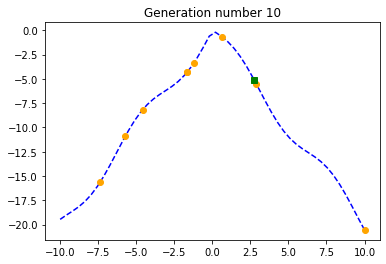

In [87]:
population = mutated_offspring.copy()

plot_population(population, generation_number)